In [117]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [118]:
ap = pd.read_csv(r'G:/Kaggle datasets/AirPassengers/AirPassengers.csv')

In [119]:
ap

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [120]:
ap.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [121]:
ap.tail()

,Month,Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [122]:
import matplotlib.pyplot as plt

%matplotlib inline

In [123]:
ap.iloc[:,1:]

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


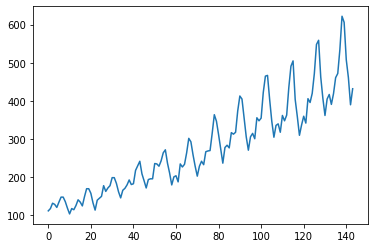

In [124]:
plt.plot(ap.iloc[:,1:])

# Scaling

In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
ap.iloc[:,1:]

,Passengers
0,112
1,118
2,132
3,129
4,121
...,...
139,606
140,508
141,461
142,390


In [127]:
scaler = MinMaxScaler(feature_range = (0,1))
ap = scaler.fit_transform(ap.iloc[:,1:])

In [128]:
ap.shape

(144, 1)

In [129]:
ap

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

# Splitting dataset into train and test

In [130]:
# Splitting dataset into train and test
training_size = int(len(ap) * 0.65)

In [131]:
training_size

93

In [132]:
len(ap)

144

In [133]:
test_size = len(ap) - training_size

In [134]:
test_size

51

In [135]:
training_data, test_data = ap[0:training_size,:], ap[training_size:len(ap),:1]

In [136]:
test_data

array([[0.38996139],
       [0.32239382],
       [0.38996139],
       [0.40733591],
       [0.38030888],
       [0.48648649],
       [0.47104247],
       [0.48455598],
       [0.61389961],
       [0.6969112 ],
       [0.7007722 ],
       [0.57915058],
       [0.46911197],
       [0.38803089],
       [0.44787645],
       [0.45559846],
       [0.41312741],
       [0.4980695 ],
       [0.47104247],
       [0.5       ],
       [0.63899614],
       [0.74710425],
       [0.77413127],
       [0.57915058],
       [0.49227799],
       [0.3976834 ],
       [0.44980695],
       [0.49420849],
       [0.45945946],
       [0.58301158],
       [0.56370656],
       [0.61003861],
       [0.71042471],
       [0.85714286],
       [0.87837838],
       [0.69305019],
       [0.58494208],
       [0.4980695 ],
       [0.58108108],
       [0.6042471 ],
       [0.55405405],
       [0.60810811],
       [0.68918919],
       [0.71042471],
       [0.83204633],
       [1.        ],
       [0.96911197],
       [0.779

In [137]:
training_data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

# Convert an array of values into a dataset of matrix

In [138]:
import numpy as np
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [],[]
    for i in range(len(dataset) - time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [139]:
# reshape it into X = t, t+1, t+2, t+3 and Y = t+4
time_step = 4
X_train, y_train = create_dataset(training_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [140]:
X_train.shape, y_train.shape, X_test.shape

((88, 4), (88,), (46, 4))

In [141]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],4,1)
X_test = X_test.reshape(X_test.shape[0],4,1)

In [142]:
X_train.shape

(88, 4, 1)

In [143]:
X_train

array([[[0.01544402],
        [0.02702703],
        [0.05405405],
        [0.04826255]],

       [[0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853]],

       [[0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556]],

       [[0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208]],

       [[0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208]],

       [[0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606]],

       [[0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753]],

       [[0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ]],

       [[0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703]],

       [[0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123552]],

       [[0.        ],
        [0.02702703],
        [0.02123552],
        [0.04247104]],

       [[0

# Create the LSTM Model

In [144]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [145]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 1, verbose = 1)

Train on 88 samples, validate on 46 samples
Epoch 1/100
88/88 [==============================] - 4s 50ms/sample - loss: 0.0145 - val_loss: 0.0257
Epoch 2/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0064 - val_loss: 0.0289
Epoch 3/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0064 - val_loss: 0.0280
Epoch 4/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0066 - val_loss: 0.0276
Epoch 5/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0051 - val_loss: 0.0278
Epoch 6/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0059 - val_loss: 0.0271
Epoch 7/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0058 - val_loss: 0.0312
Epoch 8/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0059 - val_loss: 0.0249
Epoch 9/100
88/88 [==============================] - 1s 13ms/sample - loss: 0.0055 - val_loss: 0.0224
Epoch 10/100
88/88 [==================

88/88 [==============================] - 1s 15ms/sample - loss: 0.0019 - val_loss: 0.0086
Epoch 81/100
88/88 [==============================] - 1s 15ms/sample - loss: 0.0018 - val_loss: 0.0197
Epoch 82/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0019 - val_loss: 0.0102
Epoch 83/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0018 - val_loss: 0.0083
Epoch 84/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0020 - val_loss: 0.0099
Epoch 85/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0018 - val_loss: 0.0159
Epoch 86/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0020 - val_loss: 0.0255
Epoch 87/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0017 - val_loss: 0.0092
Epoch 88/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0019 - val_loss: 0.0129
Epoch 89/100
88/88 [==============================] - 1s 14ms/sample - loss: 0.0020 - 

In [146]:
# Prediction and Performance metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [147]:
test_predict

array([[0.3689058 ],
       [0.34288573],
       [0.5192394 ],
       [0.3873329 ],
       [0.47657707],
       [0.65058315],
       [0.6367415 ],
       [0.60773313],
       [0.40833864],
       [0.3842531 ],
       [0.31536216],
       [0.45996273],
       [0.39989832],
       [0.36478332],
       [0.5262329 ],
       [0.38041326],
       [0.50240767],
       [0.6750875 ],
       [0.7013616 ],
       [0.672868  ],
       [0.30842763],
       [0.46541908],
       [0.28004315],
       [0.46395355],
       [0.45731914],
       [0.3934655 ],
       [0.64132863],
       [0.42872825],
       [0.62924916],
       [0.6913353 ],
       [0.85504276],
       [0.650513  ],
       [0.3811972 ],
       [0.4819866 ],
       [0.3234926 ],
       [0.5950079 ],
       [0.49700654],
       [0.4651457 ],
       [0.6193613 ],
       [0.638648  ],
       [0.6029248 ],
       [0.87026864],
       [0.9254409 ],
       [0.52934617],
       [0.4491566 ],
       [0.47426555]], dtype=float32)

In [148]:
# Transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [149]:
y_train.shape, train_predict.shape, train_predict

((88,),
 (88, 1),
 array([[120.848946],
        [114.918594],
        [127.63305 ],
        [139.01338 ],
        [139.30403 ],
        [129.65756 ],
        [115.31836 ],
        [101.606575],
        [111.34384 ],
        [107.793724],
        [117.39003 ],
        [131.60745 ],
        [126.76984 ],
        [119.3303  ],
        [141.38971 ],
        [160.15402 ],
        [159.88594 ],
        [150.65323 ],
        [128.99007 ],
        [112.46864 ],
        [133.4385  ],
        [135.91577 ],
        [141.34102 ],
        [169.69406 ],
        [152.81866 ],
        [165.90703 ],
        [170.71892 ],
        [191.8644  ],
        [188.8921  ],
        [175.36884 ],
        [156.56038 ],
        [142.83649 ],
        [161.27898 ],
        [162.50923 ],
        [171.91096 ],
        [185.26904 ],
        [171.48746 ],
        [177.26097 ],
        [213.72307 ],
        [218.9265  ],
        [233.50443 ],
        [193.31912 ],
        [186.68073 ],
        [167.3569  ],
        [190.9

In [150]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

212.1570530293676

In [152]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

380.5738970592085

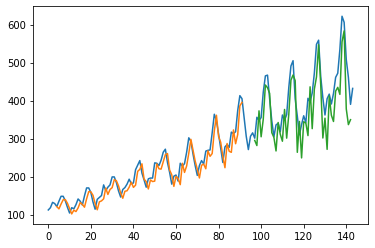

In [156]:
### Plotting
# Shift train predictions for plotting
lookback = 4
trainPredictPlot = np.empty_like(ap)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[lookback:len(train_predict)+lookback] = train_predict

# Shift test predictions for plotting
testPredictPlot = np.empty_like(ap)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(lookback*2)+1:len(ap)-1,:] = test_predict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(ap))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)